# Using GPU + Batch 16

 Train : 894 Images

 Valid : 75 Images

In [1]:
!nvidia-smi

Wed Mar 19 21:25:21 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.94                 Driver Version: 560.94         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4080 ...  WDDM  |   00000000:01:00.0  On |                  N/A |
|  0%   35C    P8             11W /  320W |     561MiB /  16376MiB |      9%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import torch

print("number of GPU: ", torch.cuda.device_count())
print("GPU Name: ", torch.cuda.get_device_name())

number of GPU:  1
GPU Name:  NVIDIA GeForce RTX 4080 SUPER


In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('using device : ', device)

using device :  cuda


In [79]:
torch.cuda.empty_cache()

In [4]:
import os
HOME = os.getcwd()
print(HOME)

c:\5025211148\YOLOv9-Segmentation


In [12]:
%pip install ultralytics

Note: you may need to restart the kernel to use updated packages.


In [5]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.98  Python-3.12.4 torch-2.4.1 CUDA:0 (NVIDIA GeForce RTX 4080 SUPER, 16376MiB)
Setup complete  (32 CPUs, 63.8 GB RAM, 227.5/476.5 GB disk)


In [6]:
from ultralytics import YOLO
from IPython.display import display, Image

In [7]:
%pip install --user roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="R66BD6MEFMOCLYffXdn9")
project = rf.workspace("mcab").project("merge-inez")
version = project.version(1)
dataset = version.download("yolov9")
                


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to merge-inez-1 in yolov9:: 100%|██████████| 1947/1947 [00:00<00:00, 3462.41it/s]


In [8]:
%cd {HOME}


c:\5025211148\YOLOv9-Segmentation


In [9]:
model = YOLO("yolov9c-seg.pt")

In [10]:
model.info()

YOLOv9c-seg summary: 654 layers, 27,897,120 parameters, 0 gradients, 159.4 GFLOPs


(654, 27897120, 0, 159.41411839999998)

In [14]:
result = model.train(data="C:\\5025211148\\YOLOv9-Segmentation\\merge-inez-1\\data.yaml", epochs=100, imgsz=640, batch=16)

New https://pypi.org/project/ultralytics/8.3.93 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.98  Python-3.12.4 torch-2.4.1 CUDA:0 (NVIDIA GeForce RTX 4080 SUPER, 16376MiB)
engine\trainer: task=segment, mode=train, model=yolov9c-seg.pt, data=C:\5025211148\YOLOv9-Segmentation\merge-inez-1\data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train10, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, r

train: Scanning C:\5025211148\YOLOv9-Segmentation\merge-inez-1\train\labels... 894 images, 0 backgrounds, 0 corrupt: 100%|██████████| 894/894 [00:00<00:00, 1119.00it/s]


train: New cache created: C:\5025211148\YOLOv9-Segmentation\merge-inez-1\train\labels.cache


val: Scanning C:\5025211148\YOLOv9-Segmentation\merge-inez-1\valid\labels... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<00:00, 573.92it/s]

val: WARNING  C:\5025211148\YOLOv9-Segmentation\merge-inez-1\valid\images\slice_234_jpg.rf.8c97c306d89d4aea1956db536d9ae8da.jpg: 1 duplicate labels removed
val: New cache created: C:\5025211148\YOLOv9-Segmentation\merge-inez-1\valid\labels.cache


Plotting labels to runs\segment\train10\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 163 weight(decay=0.0), 174 weight(decay=0.0005), 173 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\segment\train10
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100      12.3G      1.223      2.413      2.205      1.431         52        640: 100%|██████████| 56/56 [00:18<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.68it/s]

                   all         75        150          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100      12.4G      1.231      1.888      1.036      1.396         53        640: 100%|██████████| 56/56 [00:16<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.30it/s]

                   all         75        150     0.0161      0.473    0.00778    0.00229     0.0116       0.32    0.00409   0.000844



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100      12.5G      1.166      1.805     0.9263      1.363         52        640: 100%|██████████| 56/56 [00:15<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.28it/s]

                   all         75        150      0.268      0.407      0.175     0.0459      0.257      0.333      0.172     0.0465



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100      12.5G      1.128      1.842     0.8684      1.342         45        640: 100%|██████████| 56/56 [00:15<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.23it/s]

                   all         75        150     0.0177       0.46     0.0147    0.00705      0.017      0.373     0.0145    0.00713



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100      12.5G      1.065      1.691     0.7289      1.284         41        640: 100%|██████████| 56/56 [00:16<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.52it/s]

                   all         75        150      0.347      0.453      0.412      0.299      0.344      0.447        0.4      0.258



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100      12.5G       1.06      1.627     0.6887      1.278         45        640: 100%|██████████| 56/56 [00:15<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.50it/s]

                   all         75        150      0.882      0.303      0.481      0.301      0.863      0.267      0.423      0.202



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100      12.5G      1.017      1.611     0.6614      1.268         45        640: 100%|██████████| 56/56 [00:15<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.55it/s]

                   all         75        150       0.37      0.567      0.438      0.255      0.373      0.509      0.384      0.182



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100      12.5G      0.979       1.54     0.6092      1.237         52        640: 100%|██████████| 56/56 [00:15<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.35it/s]

                   all         75        150      0.721      0.707      0.774       0.48       0.71        0.7      0.738       0.47



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100      12.5G      1.002      1.579     0.6309      1.244         55        640: 100%|██████████| 56/56 [00:15<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.57it/s]

                   all         75        150        0.8      0.635      0.668      0.481        0.8      0.635      0.667      0.458



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100      12.5G     0.9755      1.505      0.592      1.216         49        640: 100%|██████████| 56/56 [00:15<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.44it/s]

                   all         75        150      0.387       0.46      0.428      0.318      0.351       0.42      0.409      0.285



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100      12.5G       0.98       1.57     0.6019      1.227         56        640: 100%|██████████| 56/56 [00:15<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.40it/s]

                   all         75        150      0.621      0.707      0.648      0.522      0.606      0.693      0.638      0.508



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100      12.5G     0.9323      1.487     0.5592      1.204         50        640: 100%|██████████| 56/56 [00:16<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.53it/s]

                   all         75        150      0.699      0.727      0.662      0.507      0.706      0.733      0.669      0.496



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100      12.5G     0.9364      1.487     0.5591      1.203         56        640: 100%|██████████| 56/56 [00:15<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.35it/s]

                   all         75        150      0.809      0.807      0.765      0.536      0.794      0.793      0.744      0.511



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100      12.5G      0.925      1.487     0.5584      1.184         47        640: 100%|██████████| 56/56 [00:15<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.47it/s]

                   all         75        150      0.768      0.813      0.749      0.526      0.795      0.833      0.791      0.509



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100      12.5G     0.9335      1.478     0.5522      1.194         57        640: 100%|██████████| 56/56 [00:15<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.61it/s]

                   all         75        150      0.719      0.587       0.62      0.513      0.663      0.593      0.613      0.496



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100      12.5G     0.9157      1.449     0.5302      1.192         60        640: 100%|██████████| 56/56 [00:15<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.52it/s]

                   all         75        150      0.797      0.773      0.717      0.531      0.812      0.787      0.725      0.533



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100      12.5G     0.9024      1.442     0.5263      1.184         55        640: 100%|██████████| 56/56 [00:15<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.42it/s]

                   all         75        150       0.75      0.738      0.688      0.526      0.779      0.765      0.717      0.515



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100      12.5G     0.9143       1.43     0.5215      1.193         59        640: 100%|██████████| 56/56 [00:16<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.34it/s]

                   all         75        150      0.743      0.701      0.697      0.545      0.743      0.701      0.697      0.514



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100      12.4G     0.8754      1.409     0.4992      1.164         45        640: 100%|██████████| 56/56 [00:16<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.43it/s]

                   all         75        150       0.85      0.693      0.741      0.536      0.781      0.787      0.785      0.528



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100      12.5G     0.9041      1.439     0.5103      1.176         48        640: 100%|██████████| 56/56 [00:16<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.47it/s]

                   all         75        150      0.722      0.613      0.612      0.432      0.727      0.613       0.62      0.369



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100      12.5G     0.8885      1.404     0.4848      1.168         57        640: 100%|██████████| 56/56 [00:15<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.54it/s]

                   all         75        150      0.745      0.733      0.684       0.53      0.735      0.727      0.665      0.503



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100      12.5G     0.8982      1.383     0.4895      1.177         54        640: 100%|██████████| 56/56 [00:15<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.54it/s]

                   all         75        150      0.794      0.728      0.724      0.495      0.813      0.745      0.732      0.488



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100      12.5G     0.8776      1.369     0.4791      1.169         50        640: 100%|██████████| 56/56 [00:15<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.48it/s]

                   all         75        150      0.737      0.713      0.667      0.493      0.807      0.771      0.757      0.506



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100      12.5G     0.8692      1.389     0.4736      1.166         46        640: 100%|██████████| 56/56 [00:15<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.45it/s]

                   all         75        150      0.764      0.793      0.705      0.534      0.822      0.837      0.754      0.531



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100      12.5G     0.8671      1.369     0.4671      1.156         49        640: 100%|██████████| 56/56 [00:16<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.07it/s]

                   all         75        150      0.834      0.783      0.804      0.567      0.849      0.793      0.824      0.568



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100      12.5G     0.8626      1.382     0.4663      1.152         49        640: 100%|██████████| 56/56 [00:16<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.43it/s]

                   all         75        150      0.892       0.78      0.836      0.544      0.852      0.811      0.847      0.517



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100      12.5G     0.8529      1.338     0.4653      1.147         54        640: 100%|██████████| 56/56 [00:16<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.50it/s]

                   all         75        150       0.68      0.673      0.628      0.504      0.706       0.68      0.663       0.49



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100      12.4G     0.8548      1.371     0.4648      1.157         60        640: 100%|██████████| 56/56 [00:16<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.28it/s]

                   all         75        150      0.787      0.718      0.714      0.539      0.841      0.757      0.772      0.543



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100      12.5G     0.8488       1.33     0.4502      1.138         54        640: 100%|██████████| 56/56 [00:16<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.46it/s]

                   all         75        150      0.793      0.765        0.7      0.543      0.802      0.787      0.729      0.516



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100      12.5G     0.8382      1.316     0.4617      1.141         49        640: 100%|██████████| 56/56 [00:15<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.50it/s]

                   all         75        150      0.732       0.74      0.672      0.528      0.828      0.806      0.752       0.53



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100      12.5G     0.8468      1.327     0.4489       1.14         59        640: 100%|██████████| 56/56 [00:16<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.30it/s]

                   all         75        150      0.746      0.785      0.688      0.538      0.826      0.811      0.767      0.526



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100      12.5G     0.8299      1.323     0.4428      1.138         42        640: 100%|██████████| 56/56 [00:16<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.34it/s]

                   all         75        150      0.675      0.652      0.599      0.523       0.67      0.647      0.598       0.49



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100      12.5G     0.8409      1.346     0.4393      1.146         49        640: 100%|██████████| 56/56 [00:15<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.53it/s]

                   all         75        150      0.849      0.875      0.835      0.572      0.837      0.864      0.814      0.552



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/100      12.5G     0.8328       1.29     0.4419      1.131         39        640: 100%|██████████| 56/56 [00:15<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.49it/s]

                   all         75        150      0.821      0.813      0.839      0.572      0.874      0.844       0.86      0.572



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/100      12.5G     0.8308      1.324     0.4364      1.129         51        640: 100%|██████████| 56/56 [00:15<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.37it/s]

                   all         75        150      0.807       0.71      0.717      0.507      0.792      0.725      0.713      0.488



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/100      12.5G     0.8089      1.292     0.4264      1.122         40        640: 100%|██████████| 56/56 [00:15<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.46it/s]

                   all         75        150      0.833      0.813      0.801      0.547      0.863       0.84      0.836      0.527



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/100      12.5G     0.8147      1.301     0.4279      1.117         62        640: 100%|██████████| 56/56 [00:16<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.44it/s]

                   all         75        150      0.831      0.813      0.815      0.585      0.834      0.807      0.816      0.573



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100      12.5G     0.8089      1.308     0.4292      1.122         49        640: 100%|██████████| 56/56 [00:15<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.10it/s]

                   all         75        150      0.813       0.72      0.733      0.487      0.832      0.731      0.762      0.465



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/100      12.5G     0.8087      1.275      0.423      1.113         48        640: 100%|██████████| 56/56 [00:15<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.41it/s]

                   all         75        150      0.848       0.86      0.817      0.581      0.887        0.9       0.89      0.575



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/100      12.5G     0.7892      1.269     0.4139       1.11         56        640: 100%|██████████| 56/56 [00:15<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.51it/s]

                   all         75        150      0.731      0.723      0.695      0.543      0.776       0.75      0.727      0.525



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/100      12.5G     0.8059      1.286     0.4168      1.124         48        640: 100%|██████████| 56/56 [00:15<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.51it/s]

                   all         75        150      0.879      0.854      0.863      0.589      0.893      0.867      0.883      0.566



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/100      12.5G      0.798      1.256     0.4072      1.109         50        640: 100%|██████████| 56/56 [00:15<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.44it/s]

                   all         75        150      0.868      0.853      0.829      0.565      0.905      0.913      0.912      0.566



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/100      12.4G     0.7846       1.26     0.4075      1.098         62        640: 100%|██████████| 56/56 [00:15<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.37it/s]

                   all         75        150      0.825      0.814      0.789      0.565      0.832       0.82      0.803      0.562



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/100      12.5G     0.7789      1.255     0.4017      1.112         39        640: 100%|██████████| 56/56 [00:15<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.29it/s]

                   all         75        150      0.784        0.8      0.805      0.556      0.865      0.853      0.858      0.556



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/100      12.5G     0.7894      1.247     0.4003        1.1         57        640: 100%|██████████| 56/56 [00:16<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.27it/s]

                   all         75        150      0.868      0.873      0.824      0.585        0.9        0.9       0.86      0.561



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/100      12.5G     0.7909      1.248     0.3978      1.106         53        640: 100%|██████████| 56/56 [00:15<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.52it/s]

                   all         75        150      0.846      0.833      0.828      0.601      0.852       0.84      0.811      0.576



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/100      12.5G     0.7712      1.221     0.3895        1.1         49        640: 100%|██████████| 56/56 [00:15<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.54it/s]

                   all         75        150       0.81      0.707      0.712      0.548      0.828       0.72      0.718      0.525



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/100      12.5G     0.7567      1.213     0.3824      1.082         54        640: 100%|██████████| 56/56 [00:15<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.51it/s]

                   all         75        150      0.848      0.837      0.813      0.591      0.855      0.843      0.811      0.561



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/100      12.5G     0.7609      1.213     0.3856        1.1         55        640: 100%|██████████| 56/56 [00:15<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.50it/s]

                   all         75        150      0.781       0.76      0.723      0.531      0.818      0.787      0.756      0.527



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/100      12.5G     0.7625      1.216      0.383       1.09         59        640: 100%|██████████| 56/56 [00:15<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.61it/s]

                   all         75        150      0.803      0.693      0.704      0.499      0.806      0.744      0.728      0.497



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/100      12.5G     0.7645      1.196     0.3811      1.097         48        640: 100%|██████████| 56/56 [00:15<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.28it/s]

                   all         75        150      0.881      0.839      0.833       0.58      0.873      0.832      0.821      0.555



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/100      12.5G     0.7566      1.196     0.3871      1.082         41        640: 100%|██████████| 56/56 [00:16<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.29it/s]

                   all         75        150      0.878       0.86      0.848        0.6      0.914      0.893      0.894       0.59



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/100      12.5G     0.7496      1.186     0.3731      1.083         44        640: 100%|██████████| 56/56 [00:15<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.57it/s]

                   all         75        150      0.836      0.874      0.817      0.593      0.893      0.887      0.872      0.584



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/100      12.5G     0.7488      1.189      0.377      1.076         65        640: 100%|██████████| 56/56 [00:15<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.58it/s]

                   all         75        150      0.838       0.82      0.787      0.581      0.866      0.839      0.811      0.558



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/100      12.1G     0.7348      1.161     0.3733      1.071         56        640: 100%|██████████| 56/56 [00:15<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.40it/s]

                   all         75        150      0.849      0.853      0.792      0.589      0.882      0.887      0.849      0.576



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/100      12.5G     0.7297       1.19     0.3718      1.074         43        640: 100%|██████████| 56/56 [00:15<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.49it/s]

                   all         75        150      0.869       0.82      0.794      0.582      0.898       0.84      0.832      0.559



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/100      12.1G     0.7245      1.174     0.3659      1.066         52        640: 100%|██████████| 56/56 [00:16<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.41it/s]

                   all         75        150      0.863      0.887      0.859      0.592      0.902       0.88      0.883      0.581



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/100      12.5G     0.7099      1.137     0.3629      1.062         62        640: 100%|██████████| 56/56 [00:15<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.40it/s]

                   all         75        150      0.888      0.867      0.842      0.587      0.917      0.893       0.87      0.577



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/100      12.5G     0.7362      1.186     0.3709      1.072         48        640: 100%|██████████| 56/56 [00:15<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.45it/s]

                   all         75        150       0.86      0.793       0.78      0.575      0.852      0.787       0.78      0.553



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/100      12.5G     0.7281       1.17     0.3646      1.071         49        640: 100%|██████████| 56/56 [00:16<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.43it/s]

                   all         75        150      0.881       0.84      0.853      0.592      0.881       0.84      0.874      0.572



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/100      12.4G     0.7119      1.141     0.3593      1.058         53        640: 100%|██████████| 56/56 [00:16<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.56it/s]

                   all         75        150      0.774      0.771      0.723      0.571      0.808      0.804      0.764       0.55



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/100      12.1G     0.7113      1.148      0.357      1.063         41        640: 100%|██████████| 56/56 [00:15<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.55it/s]

                   all         75        150      0.922      0.919      0.908      0.615      0.943      0.939       0.93      0.606



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/100      12.5G     0.7046      1.125     0.3557      1.054         55        640: 100%|██████████| 56/56 [00:15<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.48it/s]

                   all         75        150      0.856      0.797        0.8      0.589      0.896      0.828      0.851      0.586



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/100      12.5G     0.6961      1.101     0.3499      1.052         48        640: 100%|██████████| 56/56 [00:15<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.43it/s]

                   all         75        150      0.891       0.84      0.875      0.597      0.914       0.86      0.906      0.593



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/100      12.5G     0.6894        1.1     0.3419      1.049         59        640: 100%|██████████| 56/56 [00:16<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.38it/s]

                   all         75        150      0.866       0.84      0.811      0.581      0.917      0.886      0.861      0.567



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/100      12.4G     0.7003      1.111      0.346      1.051         49        640: 100%|██████████| 56/56 [00:16<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.49it/s]

                   all         75        150      0.898      0.847      0.839      0.596      0.936      0.887      0.879      0.578



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/100      12.4G     0.7053      1.108      0.349      1.062         38        640: 100%|██████████| 56/56 [00:15<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.48it/s]

                   all         75        150      0.801      0.773       0.73      0.571      0.867      0.833      0.808      0.549



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/100      12.5G     0.6867      1.084     0.3434       1.05         58        640: 100%|██████████| 56/56 [00:15<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.54it/s]

                   all         75        150      0.917      0.821      0.839      0.596       0.95      0.847       0.88      0.573



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/100        12G     0.6752       1.08     0.3379      1.044         58        640: 100%|██████████| 56/56 [00:15<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.54it/s]

                   all         75        150      0.858       0.82      0.793      0.579      0.881       0.84      0.821      0.565



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/100      12.5G     0.6695      1.076     0.3326      1.038         53        640: 100%|██████████| 56/56 [00:15<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.48it/s]

                   all         75        150      0.866       0.86      0.854      0.616      0.927       0.92      0.931      0.613



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/100      12.5G     0.6727      1.076     0.3376      1.044         53        640: 100%|██████████| 56/56 [00:16<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.44it/s]

                   all         75        150      0.828      0.812      0.763      0.585      0.863      0.846      0.807      0.569



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/100      12.5G       0.68      1.073     0.3378      1.045         46        640: 100%|██████████| 56/56 [00:16<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.29it/s]

                   all         75        150      0.851      0.827      0.832      0.622      0.873      0.847      0.856      0.609



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/100      12.5G     0.6596      1.067     0.3309      1.034         47        640: 100%|██████████| 56/56 [00:16<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.56it/s]

                   all         75        150      0.886      0.847      0.853      0.608      0.939      0.893      0.916      0.608



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/100      12.5G     0.6736      1.073     0.3382      1.041         40        640: 100%|██████████| 56/56 [00:15<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.54it/s]

                   all         75        150      0.884      0.827      0.836      0.589      0.884      0.847      0.843      0.574



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/100      12.5G     0.6656      1.069     0.3328      1.027         56        640: 100%|██████████| 56/56 [00:15<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.33it/s]

                   all         75        150      0.894      0.811      0.836      0.594      0.882      0.844      0.848      0.587



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/100      12.5G     0.6434      1.039     0.3212      1.026         48        640: 100%|██████████| 56/56 [00:15<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.24it/s]

                   all         75        150      0.841      0.844      0.808      0.578      0.888      0.891      0.888      0.574



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/100      12.1G     0.6501      1.044     0.3198      1.026         67        640: 100%|██████████| 56/56 [00:15<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.52it/s]

                   all         75        150      0.806      0.842      0.777      0.584      0.861      0.885      0.845      0.569



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/100      12.5G     0.6608      1.039     0.3183      1.018         55        640: 100%|██████████| 56/56 [00:15<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.53it/s]

                   all         75        150      0.815      0.812      0.776      0.569       0.85      0.828      0.825      0.558



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/100      12.1G     0.6508      1.053     0.3187       1.03         56        640: 100%|██████████| 56/56 [00:15<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.54it/s]

                   all         75        150      0.916      0.893      0.905      0.621      0.942      0.927      0.941      0.608



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/100      12.6G     0.6431      1.032     0.3151      1.017         35        640: 100%|██████████| 56/56 [00:15<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.43it/s]

                   all         75        150      0.896      0.855      0.882      0.605      0.962      0.865      0.919      0.594



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/100      12.5G     0.6452      1.039     0.3205      1.022         50        640: 100%|██████████| 56/56 [00:16<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.35it/s]

                   all         75        150      0.881      0.857      0.831      0.579      0.924      0.896        0.9       0.58



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/100      12.5G     0.6338      1.023     0.3115      1.012         35        640: 100%|██████████| 56/56 [00:15<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.55it/s]

                   all         75        150      0.902       0.88      0.892       0.61      0.923        0.9      0.907      0.599



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/100      12.1G      0.631      1.015     0.3099      1.008         53        640: 100%|██████████| 56/56 [00:15<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.37it/s]

                   all         75        150      0.906       0.88      0.886      0.611      0.942      0.913      0.932      0.622



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/100      12.4G     0.6269      1.008     0.3161       1.02         57        640: 100%|██████████| 56/56 [00:15<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.44it/s]

                   all         75        150      0.857      0.846      0.819      0.595      0.878      0.865      0.853      0.596



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/100      12.5G     0.6222      1.001     0.3097      1.015         50        640: 100%|██████████| 56/56 [00:15<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.40it/s]

                   all         75        150      0.904       0.86      0.876      0.617       0.94      0.893       0.91      0.612



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/100      12.4G     0.6189     0.9947     0.3031      1.012         33        640: 100%|██████████| 56/56 [00:15<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.32it/s]

                   all         75        150      0.922      0.907      0.896      0.607      0.936       0.92      0.918      0.608



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/100      12.5G      0.609      0.978     0.3021          1         38        640: 100%|██████████| 56/56 [00:16<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.47it/s]

                   all         75        150      0.892       0.88      0.877      0.609      0.928      0.913      0.911      0.608



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/100      12.5G     0.6085      1.003     0.2985      1.001         55        640: 100%|██████████| 56/56 [00:16<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.42it/s]

                   all         75        150      0.904      0.867      0.886      0.623      0.921       0.86      0.891      0.608



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/100      12.5G     0.6099      1.002      0.303      1.008         56        640: 100%|██████████| 56/56 [00:15<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.47it/s]

                   all         75        150       0.88      0.881      0.874      0.622      0.923      0.893      0.909      0.615



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/100      12.5G     0.5988     0.9786      0.294      1.005         39        640: 100%|██████████| 56/56 [00:15<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.49it/s]

                   all         75        150      0.912       0.86      0.878      0.626      0.937      0.894      0.909      0.613


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/100      12.4G     0.6042      1.025     0.2886      1.016         27        640: 100%|██████████| 56/56 [00:16<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.41it/s]

                   all         75        150      0.898      0.873      0.885      0.613      0.935      0.907      0.911      0.614



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/100      12.4G     0.5774     0.9796     0.2786     0.9952         28        640: 100%|██████████| 56/56 [00:16<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.50it/s]

                   all         75        150      0.839      0.847       0.83      0.596      0.937      0.853      0.901        0.6



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/100      12.4G     0.5691     0.9611     0.2728     0.9957         28        640: 100%|██████████| 56/56 [00:15<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.50it/s]

                   all         75        150      0.915       0.88      0.889      0.619      0.944      0.907      0.928      0.596



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/100      12.4G     0.5558     0.9417      0.267     0.9922         28        640: 100%|██████████| 56/56 [00:15<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.36it/s]

                   all         75        150      0.844      0.831      0.821      0.609      0.906       0.89      0.906      0.612



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/100      12.4G     0.5641     0.9416     0.2695     0.9804         28        640: 100%|██████████| 56/56 [00:16<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.47it/s]

                   all         75        150      0.887      0.893      0.893      0.628      0.926      0.933      0.934      0.629



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/100        12G     0.5506     0.9381     0.2642     0.9814         28        640: 100%|██████████| 56/56 [00:15<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.53it/s]

                   all         75        150      0.888      0.893      0.884      0.633      0.979       0.92       0.96      0.625



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/100      12.4G     0.5469     0.9407     0.2602     0.9804         28        640: 100%|██████████| 56/56 [00:15<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.59it/s]

                   all         75        150      0.889      0.887      0.884      0.621      0.923       0.92       0.92      0.623



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/100      12.4G     0.5439     0.9335     0.2602     0.9868         28        640: 100%|██████████| 56/56 [00:16<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.55it/s]

                   all         75        150      0.904      0.887      0.889       0.63      0.953      0.933      0.948      0.621



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/100      12.4G     0.5339     0.9263     0.2607     0.9679         28        640: 100%|██████████| 56/56 [00:15<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.39it/s]

                   all         75        150      0.899      0.893      0.892      0.623      0.954      0.947      0.949      0.622



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/100      12.4G     0.5226     0.9137     0.2541     0.9624         28        640: 100%|██████████| 56/56 [00:15<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.26it/s]

                   all         75        150      0.895      0.893      0.884      0.623      0.948       0.94      0.949      0.624



100 epochs completed in 0.499 hours.
Optimizer stripped from runs\segment\train10\weights\last.pt, 56.2MB
Optimizer stripped from runs\segment\train10\weights\best.pt, 56.2MB

Validating runs\segment\train10\weights\best.pt...
Ultralytics YOLOv8.2.98  Python-3.12.4 torch-2.4.1 CUDA:0 (NVIDIA GeForce RTX 4080 SUPER, 16376MiB)
YOLOv9c-seg summary (fused): 411 layers, 27,626,070 parameters, 0 gradients, 157.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.28it/s]


                   all         75        150      0.888      0.893      0.884      0.633      0.974      0.924       0.96      0.625
                    ab         75         75      0.989          1      0.995      0.979      0.993          1      0.995      0.935
                    mc         75         75      0.787      0.786      0.773      0.287      0.955      0.849      0.925      0.315
Speed: 0.4ms preprocess, 5.9ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs\segment\train10



image 1/1 C:\5025211148\YOLOv9-Segmentation\merge-inez-1\valid\images\slice_2_png.rf.773ebb3973e8d24b3610d7d5889312bf.jpg: 640x640 1 ab, 1 mc, 31.6ms
Speed: 2.0ms preprocess, 31.6ms inference, 18.1ms postprocess per image at shape (1, 3, 640, 640)


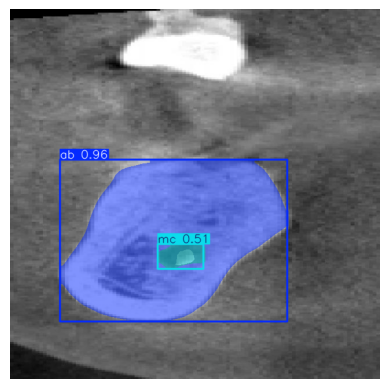

In [15]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from ultralytics import YOLO

model = YOLO("C:\\5025211148\\YOLOv9-Segmentation\\runs\\segment\\train10\\weights\\best.pt")  # load a custom model

# Predict with the model
results = model("C:\\5025211148\\YOLOv9-Segmentation\\merge-inez-1\\valid\\images\\slice_2_png.rf.773ebb3973e8d24b3610d7d5889312bf.jpg")


predicted_img = results[0].plot()
output_dir = "C:\\5025211148\\YOLOv9-Segmentation\\runs\\segment\\predict"
os.makedirs(output_dir, exist_ok=True)

output_image_path = os.path.join(output_dir, "predicted.jpg")

cv2.imwrite(output_image_path, predicted_img)

predicted_img_rgb = cv2.cvtColor(predicted_img, cv2.COLOR_BGR2RGB)

plt.imshow(predicted_img_rgb)
plt.axis('off')  # Hilangkan sumbu
plt.show()

In [16]:
model_path = r'C:\\5025211148\\YOLOv9-Segmentation\\runs\\segment\\train10\\weights\\best.pt'
valid_path = r'C:\\5025211148\\YOLOv9-Segmentation\\merge-inez-1\\valid\\images'
ground_truth_path = r'C:\\5025211148\\YOLOv9-Segmentation\\merge-inez-1\\valid\\labels'
gt_AB_path = r"C:\\5025211148\\YOLOv9-Segmentation\\Dataset Train Val\\gt-AB"
gt_MC_path = r"C:\\5025211148\\YOLOv9-Segmentation\\Dataset Train Val\\gt-MC"

segmented_AB_path = fr'C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB'
segmented_AB_path_2 = r'C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB'
segmented_AB_npy = r'C:\\5025211148\\YOLOv9-Segmentation\\yolov9c-segmented_AB.npy'

segmented_MC_path = fr'C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC'
segmented_MC_path_2 = r'C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC'
segmented_MC_npy = r'C:\\5025211148\\YOLOv9-Segmentation\\yolov9c-segmented_MC.npy'

for path in [gt_AB_path, gt_MC_path, segmented_AB_path, segmented_MC_path]:
  os.makedirs(path, exist_ok=True)

In [23]:
import os
import re

# specify the directory path
directory_path = valid_path

# create an empty list to store the filenames with directory path
file_list = []

# iterate over the files in the directory
for filename in os.listdir(directory_path):
    # check if the item is a file
    if os.path.isfile(os.path.join(directory_path, filename)):
        # append the filename with directory path to the list
        file_list.append(os.path.join(directory_path, filename))

def extract_number(s):
    match = re.search(r'slice_(\d+)', s)  # Match 'slice_' followed by one or more digits
    return int(match.group(1)) if match else float('inf')

file_list = sorted(file_list, key=extract_number)
for filename in file_list:
    print(filename)
# print(file_list)  # Output: sorted file_list with filenames like 'slice_0', 'slice_1', 'slice_2', etc.


C:\\5025211148\\YOLOv9-Segmentation\\merge-inez-1\\valid\\images\slice_0_png.rf.b6a308ad17de783c210d9ceb410d76a1.jpg
C:\\5025211148\\YOLOv9-Segmentation\\merge-inez-1\\valid\\images\slice_1_png.rf.813ec633aebc1e939b902b040068a91a.jpg
C:\\5025211148\\YOLOv9-Segmentation\\merge-inez-1\\valid\\images\slice_2_png.rf.773ebb3973e8d24b3610d7d5889312bf.jpg
C:\\5025211148\\YOLOv9-Segmentation\\merge-inez-1\\valid\\images\slice_3_png.rf.2b7ac0dccdcc3241e2441dcdfe40b19a.jpg
C:\\5025211148\\YOLOv9-Segmentation\\merge-inez-1\\valid\\images\slice_4_png.rf.ed9951865dd8c8e9c4bb357b12d90bf3.jpg
C:\\5025211148\\YOLOv9-Segmentation\\merge-inez-1\\valid\\images\slice_5_png.rf.fa534a063f0865aba05bfb1f39bf17f1.jpg
C:\\5025211148\\YOLOv9-Segmentation\\merge-inez-1\\valid\\images\slice_6_png.rf.69513226c67a48924c9727490a40871b.jpg
C:\\5025211148\\YOLOv9-Segmentation\\merge-inez-1\\valid\\images\slice_7_png.rf.911a9c8ba0e64b11ffd5e11ceb31250e.jpg
C:\\5025211148\\YOLOv9-Segmentation\\merge-inez-1\\valid\\images

In [24]:
from ultralytics import YOLO

# Load a model
model = YOLO(model_path, task='segment')  # load a pretrained model (recommended for training)

In [25]:
results = model(file_list, save=True)


0: 640x640 1 ab, 1 mc, 10.5ms
1: 640x640 1 ab, 1 mc, 10.5ms
2: 640x640 1 ab, 1 mc, 10.5ms
3: 640x640 1 ab, 1 mc, 10.5ms
4: 640x640 1 ab, 1 mc, 10.5ms
5: 640x640 1 ab, 1 mc, 10.5ms
6: 640x640 1 ab, 1 mc, 10.5ms
7: 640x640 1 ab, 1 mc, 10.5ms
8: 640x640 1 ab, 1 mc, 10.5ms
9: 640x640 1 ab, 1 mc, 10.5ms
10: 640x640 1 ab, 1 mc, 10.5ms
11: 640x640 1 ab, 1 mc, 10.5ms
12: 640x640 1 ab, 1 mc, 10.5ms
13: 640x640 1 ab, 1 mc, 10.5ms
14: 640x640 1 ab, 2 mcs, 10.5ms
15: 640x640 1 ab, 1 mc, 10.5ms
16: 640x640 1 ab, 1 mc, 10.5ms
17: 640x640 1 ab, 10.5ms
18: 640x640 1 ab, 1 mc, 10.5ms
19: 640x640 1 ab, 1 mc, 10.5ms
20: 640x640 1 ab, 1 mc, 10.5ms
21: 640x640 1 ab, 1 mc, 10.5ms
22: 640x640 1 ab, 1 mc, 10.5ms
23: 640x640 1 ab, 1 mc, 10.5ms
24: 640x640 1 ab, 1 mc, 10.5ms
25: 640x640 1 ab, 1 mc, 10.5ms
26: 640x640 1 ab, 1 mc, 10.5ms
27: 640x640 1 ab, 1 mc, 10.5ms
28: 640x640 1 ab, 1 mc, 10.5ms
29: 640x640 1 ab, 1 mc, 10.5ms
30: 640x640 1 ab, 1 mc, 10.5ms
31: 640x640 1 ab, 1 mc, 10.5ms
32: 640x640 1 ab, 1 mc

In [26]:
print(len(results))

75


In [27]:
import torch
import cv2
import numpy as np
i = 0
x = 101
y = 200

for result in results:
  if(result.masks is not None):
    # get the AB masks
    boxes = result.boxes.data
    clss = boxes[:, 5]
    AB_indices = torch.where(clss == 0)
    AB_indices = (AB_indices[0][0].unsqueeze(0),)
    # AB_indices = AB_indices[0][0]
    print('class', clss)
    print('indices', AB_indices)
    # Convert mask to single channel image
    try:
      mask_raw = result.masks.cpu().data[[AB_indices]].numpy().transpose(1, 2, 0)
      # Convert single channel grayscale to 3 channel image
      mask_3channel = cv2.merge((mask_raw,mask_raw,mask_raw))

      # Get the size of the original image (height, width, channels)
      h2, w2, c2 = result.orig_img.shape

      # Resize the mask to the same size as the image (can probably be removed if image is the same size as the model)
      mask = cv2.resize(mask_3channel, (w2, h2))

      # Convert BGR to HSV
      hsv = cv2.cvtColor(mask, cv2.COLOR_BGR2HSV)

      # Define range of brightness in HSV
      lower_black = np.array([0,0,0])
      upper_black = np.array([0,0,1])

      # Create a mask. Threshold the HSV image to get everything black
      mask = cv2.inRange(mask, lower_black, upper_black)

      # Invert the mask to get everything but black
      mask = cv2.bitwise_not(mask)

      # Apply the mask to the original image
      masked = cv2.bitwise_and(result.orig_img, result.orig_img, mask=mask)

      # Show the masked part of the image
      # cv2.imshow("mask", masked)
      resized_mask = cv2.resize(mask, (101, 200))
      cv2.imwrite(fr'{segmented_AB_path}\\merged_segs_{i}.jpg', resized_mask)
      print(fr'{segmented_AB_path}\\merged_segs_{i}.jpg')
    except Exception as e:
      print('error',e)
      # print('\n')
      continue
  else:
    width = 101
    height = 200
    black_image = np.zeros((height, width), dtype=np.uint8)
    print('ada yang kosong lo..')
    # Save the black image to a file
    cv2.imwrite(fr'{segmented_AB_path}\\merged_segs_{i}.jpg', black_image)
    print(fr'{segmented_AB_path}\\merged_segs_{i}.jpg')
  print('\n')
  i = i+1

class tensor([0., 1.], device='cuda:0')
indices (tensor([0], device='cuda:0'),)
C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB\\merged_segs_0.jpg


class tensor([0., 1.], device='cuda:0')
indices (tensor([0], device='cuda:0'),)
C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB\\merged_segs_1.jpg


class tensor([0., 1.], device='cuda:0')
indices (tensor([0], device='cuda:0'),)
C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB\\merged_segs_2.jpg


class tensor([0., 1.], device='cuda:0')
indices (tensor([0], device='cuda:0'),)
C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB\\merged_segs_3.jpg


class tensor([0., 1.], device='cuda:0')
indices (tensor([0], device='cuda:0'),)
C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB\\merged_segs_4.jpg


class tensor([0., 1.], device='cuda:0')
indices (tensor([0], device='cuda:0'),)
C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB\\merged_segs_5.jpg


class tensor([0., 1.], device='cuda:0')
indices (tensor([0], device='cuda:0'),)
C:\\5025211148

In [28]:
import os
import re

# specify the directory path
directory_path = segmented_AB_path_2

# create an empty list to store the filenames with directory path
file_list_AB = []

# iterate over the files in the directory
for filename in os.listdir(directory_path):
    # check if the item is a file
    if os.path.isfile(os.path.join(directory_path, filename)):
        # append the filename with directory path to the list
        file_list_AB.append(os.path.join(directory_path, filename))

def extract_number(s):
    match = re.search(r'merged_segs_(\d+)', s)  # Match 'merged_segs_' followed by one or more digits
    return int(match.group(1)) if match else float('inf')

file_list_AB = sorted(file_list_AB, key=extract_number)
for filename in file_list_AB:
    print(filename)
# print(file_list)  # Output: sorted file_list with filenames like 'merged_segs_0', 'merged_segs_1', 'merged_segs_2', etc.


C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB\merged_segs_0.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB\merged_segs_1.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB\merged_segs_2.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB\merged_segs_3.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB\merged_segs_4.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB\merged_segs_5.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB\merged_segs_6.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB\merged_segs_7.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB\merged_segs_8.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB\merged_segs_9.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB\merged_segs_10.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB\merged_segs_11.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB\merged_segs_12.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB\merged_segs_13.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segment

In [29]:
import numpy as np
from PIL import Image  # If your images are in image files

# Assuming img_files is a list of file paths to the 2D images
# img_files = ['image1.png', 'image2.png', 'image3.png']  # Replace with your actual file paths

# Load the images and convert them to numpy arrays
image_arrays = [np.array(Image.open(img_file)) for img_file in file_list_AB]

# Stack the image arrays into a 3D numpy array
stacked_images = np.stack(image_arrays, axis=0)

# stacked_images is now a 3D numpy array where the first dimension represents the index of the image in the list

# Example usage:
print(stacked_images.shape)  # Output: (3, height, width, channels) assuming RGB images

np.save(segmented_AB_npy, stacked_images)

(75, 200, 101)


In [30]:
import torch
import cv2
i = 0
x = 101
y = 200

for result in results:
  if(result.masks is not None):
    # get the AB masks
    try:
      boxes = result.boxes.data
      clss = boxes[:, 5]
      AB_indices = torch.where(clss == 1)
      AB_indices = (AB_indices[0][0].unsqueeze(0),)
      # AB_indices = AB_indices[0][0]
      print('class', clss)
      print('indices', AB_indices)
      # Convert mask to single channel image
      mask_raw = result.masks.cpu().data[[AB_indices]].numpy().transpose(1, 2, 0)
      # Convert single channel grayscale to 3 channel image
      mask_3channel = cv2.merge((mask_raw,mask_raw,mask_raw))

      # Get the size of the original image (height, width, channels)
      h2, w2, c2 = result.orig_img.shape

      # Resize the mask to the same size as the image (can probably be removed if image is the same size as the model)
      mask = cv2.resize(mask_3channel, (w2, h2))

      # Convert BGR to HSV
      hsv = cv2.cvtColor(mask, cv2.COLOR_BGR2HSV)

      # Define range of brightness in HSV
      lower_black = np.array([0,0,0])
      upper_black = np.array([0,0,1])

      # Create a mask. Threshold the HSV image to get everything black
      mask = cv2.inRange(mask, lower_black, upper_black)

      # Invert the mask to get everything but black
      mask = cv2.bitwise_not(mask)

      # Apply the mask to the original image
      masked = cv2.bitwise_and(result.orig_img, result.orig_img, mask=mask)

      # Show the masked part of the image
      # cv2.imshow("mask", masked)
      resized_mask = cv2.resize(mask, (101, 200))
      cv2.imwrite(fr'{segmented_MC_path}\\merged_segs_{i}.jpg', resized_mask)
      print(fr'{segmented_MC_path}\\merged_segs_{i}.jpg')
      print('ketemu')
    except Exception as e:
      print('error',e)
      width = 101
      height = 200
      black_image = np.zeros((height, width), dtype=np.uint8)
      print('tidak ada mc lo..')
      # Save the black image to a file
      cv2.imwrite(fr'{segmented_MC_path}\\merged_segs_{i}.jpg', black_image)
      print(fr'{segmented_MC_path}\\merged_segs_{i}.jpg')
      i = i+1
      continue
  else:
    width = 101
    height = 200
    black_image = np.zeros((height, width), dtype=np.uint8)
    print('ada yang kosong lo..')
    # Save the black image to a file
    cv2.imwrite(fr'{segmented_MC_path}\\merged_segs_{i}.jpg', black_image)
    print(fr'{segmented_MC_path}\\merged_segs_{i}.jpg')
  print('\n')
  i = i+1

class tensor([0., 1.], device='cuda:0')
indices (tensor([1], device='cuda:0'),)
C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC\\merged_segs_0.jpg
ketemu


class tensor([0., 1.], device='cuda:0')
indices (tensor([1], device='cuda:0'),)
C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC\\merged_segs_1.jpg
ketemu


class tensor([0., 1.], device='cuda:0')
indices (tensor([1], device='cuda:0'),)
C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC\\merged_segs_2.jpg
ketemu


class tensor([0., 1.], device='cuda:0')
indices (tensor([1], device='cuda:0'),)
C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC\\merged_segs_3.jpg
ketemu


class tensor([0., 1.], device='cuda:0')
indices (tensor([1], device='cuda:0'),)
C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC\\merged_segs_4.jpg
ketemu


class tensor([0., 1.], device='cuda:0')
indices (tensor([1], device='cuda:0'),)
C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC\\merged_segs_5.jpg
ketemu


class tensor([0., 1.], device='cuda:0')
indices (ten

In [31]:
import os
import re

# specify the directory path
directory_path = segmented_MC_path_2

# create an empty list to store the filenames with directory path
file_list_MC = []

# iterate over the files in the directory
for filename in os.listdir(directory_path):
    # check if the item is a file
    if os.path.isfile(os.path.join(directory_path, filename)):
        # append the filename with directory path to the list
        file_list_MC.append(os.path.join(directory_path, filename))

def extract_number(s):
    match = re.search(r'merged_segs_(\d+)', s)  # Match 'merged_segs_' followed by one or more digits
    return int(match.group(1)) if match else float('inf')

file_list_MC = sorted(file_list_MC, key=extract_number)
for filename in file_list_MC:
    print(filename)
# print(file_list)  # Output: sorted file_list with filenames like 'merged_segs_0', 'merged_segs_1', 'merged_segs_2', etc.


C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC\merged_segs_0.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC\merged_segs_1.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC\merged_segs_2.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC\merged_segs_3.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC\merged_segs_4.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC\merged_segs_5.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC\merged_segs_6.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC\merged_segs_7.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC\merged_segs_8.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC\merged_segs_9.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC\merged_segs_10.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC\merged_segs_11.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC\merged_segs_12.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC\merged_segs_13.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segment

In [32]:
import numpy as np
from PIL import Image  # If your images are in image files

# Assuming img_files is a list of file paths to the 2D images
# img_files = ['image1.png', 'image2.png', 'image3.png']  # Replace with your actual file paths

# Load the images and convert them to numpy arrays
image_arrays = [np.array(Image.open(img_file)) for img_file in file_list_MC]

# Stack the image arrays into a 3D numpy array
stacked_images = np.stack(image_arrays, axis=0)

# stacked_images is now a 3D numpy array where the first dimension represents the index of the image in the list

# Example usage:
print(stacked_images.shape)  # Output: (3, height, width, channels) assuming RGB images

np.save(segmented_MC_npy, stacked_images)

(75, 200, 101)


In [33]:
import os
import cv2
import numpy as np

# Directory paths
img_path = valid_path
gt_path = ground_truth_path
output_path = gt_AB_path

# Ensure output directory exists
if not os.path.exists(output_path):
    os.makedirs(output_path)

# Iterate over files in the image directory
for img_file in os.listdir(img_path):
    if img_file.endswith(".jpg") or img_file.endswith(".png"):  # adjust based on your image format
        # Read the image
        img = cv2.imread(os.path.join(img_path, img_file))

        # Create a blank white image with the same dimensions as the original image
        mask = np.ones_like(img) * 255

        # Read the corresponding ground truth file
        gt_file = os.path.splitext(img_file)[0] + ".txt"  # assuming ground truth files have the same name as images
        gt_file_path = os.path.join(gt_path, gt_file)

        if os.path.exists(gt_file_path):
            class_0_points = []
            class_1_points = []
            with open(gt_file_path, "r") as file:
                lines = file.readlines()
                for line in lines:
                    data = line.split()
                    class_label = int(data[0])
                    points = [(float(data[i]), float(data[i+1])) for i in range(1, len(data), 2)]
                    # Convert normalized coordinates to pixel coordinates
                    img_height, img_width, _ = img.shape
                    points = [(int(point[0] * img_width), int(point[1] * img_height)) for point in points]
                    if class_label == 0:
                        class_0_points.extend(points)
                    elif class_label == 1:
                        class_1_points.extend(points)

            # Create numpy arrays of points for drawing the polygons
            polygon_points_0 = np.array(class_0_points)
            polygon_points_1 = np.array(class_1_points)

            # Draw the filled polygons on the mask
            if len(polygon_points_0) > 0:
                cv2.fillPoly(mask, [polygon_points_0], color=(0, 0, 0))
            if len(polygon_points_1) > 0:
                cv2.fillPoly(mask, [polygon_points_1], color=(255, 255, 255))

            # Resize the output image to 101x200
            mask = 255 - mask
            mask_resized = cv2.resize(mask, (101, 200))

            # Save the output image as JPEG
            output_file = os.path.splitext(img_file)[0] + "_output.jpg"
            output_file_path = os.path.join(output_path, output_file)
            cv2.imwrite(output_file_path, mask_resized)

            print(f"Saved resized output image for {img_file} as {output_file_path}")
        else:
            print(f"No ground truth file found for {img_file}")

# image_loader = ImageLoader(output_path)
# gt_AB = image_loader.load_images()


Saved resized output image for slice_0_png.rf.b6a308ad17de783c210d9ceb410d76a1.jpg as C:\\5025211148\\YOLOv9-Segmentation\\Dataset Train Val\\gt-AB\slice_0_png.rf.b6a308ad17de783c210d9ceb410d76a1_output.jpg
Saved resized output image for slice_10_png.rf.8cfc23276c5e0a0a9c082a84937bbfa9.jpg as C:\\5025211148\\YOLOv9-Segmentation\\Dataset Train Val\\gt-AB\slice_10_png.rf.8cfc23276c5e0a0a9c082a84937bbfa9_output.jpg
Saved resized output image for slice_11_png.rf.2f4ba45901be13bdd4a6d27191f04632.jpg as C:\\5025211148\\YOLOv9-Segmentation\\Dataset Train Val\\gt-AB\slice_11_png.rf.2f4ba45901be13bdd4a6d27191f04632_output.jpg
Saved resized output image for slice_12_png.rf.e697ea8e2a874fe7e9b6625b141d770f.jpg as C:\\5025211148\\YOLOv9-Segmentation\\Dataset Train Val\\gt-AB\slice_12_png.rf.e697ea8e2a874fe7e9b6625b141d770f_output.jpg
Saved resized output image for slice_13_png.rf.3e77ef333ad7540a2e71c11b85729e94.jpg as C:\\5025211148\\YOLOv9-Segmentation\\Dataset Train Val\\gt-AB\slice_13_png.rf.3

In [34]:
import os
import cv2
import numpy as np

# Directory paths
img_path = valid_path
gt_path = ground_truth_path
output_path = gt_MC_path

# Ensure output directory exists
if not os.path.exists(output_path):
    os.makedirs(output_path)

# Iterate over files in the image directory
for img_file in os.listdir(img_path):
    if img_file.endswith(".jpg") or img_file.endswith(".png"):  # adjust based on your image format
        # Read the image
        img = cv2.imread(os.path.join(img_path, img_file))

        # Create a blank white image with the same dimensions as the original image
        mask = np.ones_like(img) * 255

        # Read the corresponding ground truth file
        gt_file = os.path.splitext(img_file)[0] + ".txt"  # assuming ground truth files have the same name as images
        gt_file_path = os.path.join(gt_path, gt_file)

        if os.path.exists(gt_file_path):
            class_0_points = []
            with open(gt_file_path, "r") as file:
                lines = file.readlines()
                for line in lines:
                    data = line.split()
                    class_label = int(data[0])
                    if class_label == 1:
                        points = [(float(data[i]), float(data[i+1])) for i in range(1, len(data), 2)]
                        # Convert normalized coordinates to pixel coordinates
                        img_height, img_width, _ = img.shape
                        points = [(int(point[0] * img_width), int(point[1] * img_height)) for point in points]
                        class_0_points.extend(points)

            # Create a numpy array of points for drawing the polygon
            polygon_points = np.array(class_0_points)

            # Draw the filled polygon on the mask
            if len(polygon_points) > 0:
                cv2.fillPoly(mask, [polygon_points], color=(0, 0, 0))

            # Resize the output image to 101x200
            mask = 255 - mask
            mask_resized = cv2.resize(mask, (101, 200))

            # Save the output image as JPEG
            output_file = os.path.splitext(img_file)[0] + "_output.jpg"
            output_file_path = os.path.join(output_path, output_file)
            cv2.imwrite(output_file_path, mask_resized)

            print(f"Saved resized output image for {img_file} as {output_file_path}")
        else:
            print(f"No ground truth file found for {img_file}")

# image_loader = ImageLoader(output_path)
# gt_MC = image_loader.load_images()

Saved resized output image for slice_0_png.rf.b6a308ad17de783c210d9ceb410d76a1.jpg as C:\\5025211148\\YOLOv9-Segmentation\\Dataset Train Val\\gt-MC\slice_0_png.rf.b6a308ad17de783c210d9ceb410d76a1_output.jpg
Saved resized output image for slice_10_png.rf.8cfc23276c5e0a0a9c082a84937bbfa9.jpg as C:\\5025211148\\YOLOv9-Segmentation\\Dataset Train Val\\gt-MC\slice_10_png.rf.8cfc23276c5e0a0a9c082a84937bbfa9_output.jpg
Saved resized output image for slice_11_png.rf.2f4ba45901be13bdd4a6d27191f04632.jpg as C:\\5025211148\\YOLOv9-Segmentation\\Dataset Train Val\\gt-MC\slice_11_png.rf.2f4ba45901be13bdd4a6d27191f04632_output.jpg
Saved resized output image for slice_12_png.rf.e697ea8e2a874fe7e9b6625b141d770f.jpg as C:\\5025211148\\YOLOv9-Segmentation\\Dataset Train Val\\gt-MC\slice_12_png.rf.e697ea8e2a874fe7e9b6625b141d770f_output.jpg
Saved resized output image for slice_13_png.rf.3e77ef333ad7540a2e71c11b85729e94.jpg as C:\\5025211148\\YOLOv9-Segmentation\\Dataset Train Val\\gt-MC\slice_13_png.rf.3

In [35]:
import os
import cv2
import numpy as np
import re

def read_images_as_binary_sorted(path, threshold=127):
    image_list = []

    # Get all files in the folder
    files = os.listdir(path)

    # Sort files based on filenames
    sorted_files = sorted(files, key=sort_key)

    # Iterate over sorted files
    for file_name in sorted_files:
        # Check if the file is an image (you can adjust the condition based on your image formats)
        if file_name.endswith(".jpg") or file_name.endswith(".png"):
            # Read the image in grayscale
            image_path = os.path.join(path, file_name)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

            if image is not None:
                # Apply thresholding to convert grayscale to binary image
                _, binary_image = cv2.threshold(image, threshold, 1, cv2.THRESH_BINARY)
                image_list.append(binary_image)
                # unique_values, counts = np.unique(binary_image, return_counts=True)
                # for value, count in zip(unique_values, counts):
                    # print(f"{value}: {count}")

    # Convert the list of images to a numpy array
    image_array = np.array(image_list)
    return image_array

def sort_key(file_name):
    parts = re.split(r'(\d+)', file_name)
    parts[1::2] = map(int, parts[1::2])  # Convert numeric parts to integers
    return parts

# Example usage:
# sorted_images = read_images_as_grayscale_sorted("/path/to/images")


In [36]:
# Example usage:
path_to_images = gt_AB_path
gt_AB = read_images_as_binary_sorted(path_to_images)
print("Shape of images array:", gt_AB.shape)

Shape of images array: (75, 200, 101)


In [37]:

# Example usage:
path_to_images = gt_MC_path
gt_MC = read_images_as_binary_sorted(path_to_images)
print("Shape of images array:", gt_MC.shape)

Shape of images array: (75, 200, 101)


In [38]:

# Example usage:
path_to_images = segmented_AB_path
segmented_AB = read_images_as_binary_sorted(path_to_images)
print("Shape of images array:", segmented_AB.shape)

Shape of images array: (75, 200, 101)


In [39]:

# Example usage:
path_to_images = segmented_MC_path
segmented_MC = read_images_as_binary_sorted(path_to_images)
print("Shape of images array:", segmented_MC.shape)

Shape of images array: (75, 200, 101)


In [40]:
import numpy as np
from sklearn.metrics import confusion_matrix


def calculate_iou(gt, pred):
    unique_gt = np.unique(gt)
    unique_pred = np.unique(pred)

    # If both gt and pred contain only one unique value and they are equal,
    # then IoU is 1
    if len(unique_gt) == len(unique_pred) == 1 and unique_gt[0] == unique_pred[0]:
        return 1.0

    # print(gt.shape)
    cm = confusion_matrix(gt.flatten(), pred.flatten())
    # unique_values, counts = np.unique(gt, return_counts=True)
    # for value, count in zip(unique_values, counts):
    #    print(f"{value}: {count}")
    # print(cm)
    intersection = np.diag(cm) #TN dan TP
    union = np.sum(cm, axis=0) + np.sum(cm, axis=1) - intersection
    # print(np.sum(cm, axis=0))
    # print(np.sum(cm, axis=1))
    # print(intersection)
    # iou = np.mean((intersection + 1e-10) / (union + 1e-10))
    # only calculate the iou for AB or MC thats why we use index [1] in intersection
    iou = (intersection[1] + 1e-10) / (union[1] + 1e-10)
    return iou

def calculate_dice_score(gt, pred):
    unique_gt = np.unique(gt)
    unique_pred = np.unique(pred)

    # If both gt and pred contain only one unique value and they are equal,
    # then IoU is 1
    if len(unique_gt) == len(unique_pred) == 1 and unique_gt[0] == unique_pred[0]:
        return 1.0
    cm = confusion_matrix(gt.flatten(), pred.flatten())
    intersection = np.diag(cm)
    union_dice = np.sum(cm, axis=0) + np.sum(cm, axis=1)
    # dice_score = np.mean(2 * (intersection + 1e-10) / (union_dice + 1e-10))
    dice_score = 2 * (intersection[1] + 1e-10) / (union_dice[1] + 1e-10)
    return dice_score

def calculate_average_iou_and_dice(gt_images, pred_images):
    num_images = gt_images.shape[0]
    iou_scores = []
    dice_scores = []

    for i in range(num_images):
        gt_image = gt_images[i]
        pred_image = pred_images[i]
        iou = calculate_iou(gt_image, pred_image)
        dice = calculate_dice_score(gt_image, pred_image)
        print(i,"iou:",iou)
        print(i,"dice:",dice)
        iou_scores.append(iou)
        dice_scores.append(dice)

    avg_iou = np.nanmean(iou_scores)  # Use np.nanmean to handle NaN values
    avg_dice = np.nanmean(dice_scores)  # Use np.nanmean to handle NaN values
    return avg_iou, avg_dice

# Example usage:
# gt_images and pred_images are numpy arrays containing grayscale images
# Each array should have shape (num_images, height, width)


In [41]:
avg_iou, avg_dice = calculate_average_iou_and_dice(segmented_AB, gt_AB)
print("Average IOU:", avg_iou)
print("Average DSC:", avg_dice)
print()
# print("Average Dice Score:", avg_dice)

0 iou: 0.9434998692126617
0 dice: 0.9709286675639439
1 iou: 0.9270034382438528
1 dice: 0.9621191325830503
2 iou: 0.9296218487394976
2 dice: 0.9635274904736124
3 iou: 0.9306388526727528
3 dice: 0.964073473797961
4 iou: 0.9567983037370804
4 dice: 0.9779222538263717
5 iou: 0.9480553380318468
5 dice: 0.9733351199249769
6 iou: 0.9584422373235766
6 dice: 0.978780194848539
7 iou: 0.9517978113600847
7 dice: 0.9753036977706718
8 iou: 0.9529870129870142
8 dice: 0.9759276499534649
9 iou: 0.9425974025974041
9 dice: 0.9704505949993453
10 iou: 0.9467610805140323
10 dice: 0.9726525663478517
11 iou: 0.9403836184551596
11 dice: 0.9692759818327682
12 iou: 0.9360980699008885
12 dice: 0.9669944766267147
13 iou: 0.9275399690562164
13 dice: 0.9624080267558667
14 iou: 0.9476226798881274
14 dice: 0.9731070496083685
15 iou: 0.9419778002018178
15 dice: 0.9701221096388806
16 iou: 0.9408941651932321
16 dice: 0.9695471108797635
17 iou: 0.8734339865081955
17 dice: 0.9324417009602378
18 iou: 0.9002642007926057
18 di

In [ ]:
avg_iou, avg_dice = calculate_average_iou_and_dice(segmented_MC, gt_MC)
print("Average IOU:", avg_iou)
print("Average DSC:", avg_dice)
# print("Average Dice Score:", avg_dice)

0 iou: 0.6277372262776441
0 dice: 0.7713004484310443
1 iou: 0.7088607594938552
1 dice: 0.8296296296300631
2 iou: 0.7898089171975862
2 dice: 0.8825622775804689
3 iou: 0.7261146496817031
3 dice: 0.8413284132845604
4 iou: 0.7253521126762499
4 dice: 0.8408163265310854
5 iou: 0.7741935483872425
5 dice: 0.8727272727276827
6 iou: 0.787401574803317
6 dice: 0.88105726872296
7 iou: 0.7674418604652966
7 dice: 0.8684210526320754
8 iou: 0.8074074074075501
8 dice: 0.8934426229512732
9 iou: 0.738095238095446
9 dice: 0.8493150684936762
10 iou: 0.7531645569621817
10 dice: 0.8592057761736971
11 iou: 0.7160493827162248
11 dice: 0.8345323741011387
12 iou: 0.694805194805393
12 dice: 0.8199233716479618
13 iou: 0.5266272189351914
13 dice: 0.6899224806206629
14 iou: 0.6645161290324746
14 dice: 0.7984496124035666
15 iou: 0.6770186335405733
15 dice: 0.8074074074078491
16 iou: 0.6984126984128579
16 dice: 0.8224299065424229
17 iou: 4.2918454935603903e-13
17 dice: 8.583690987120781e-13
18 iou: 0.35986159169572324


: 